In [27]:
import chess
import chess.svg
from IPython.display import SVG
import random
import matplotlib.pyplot as plt
import pandas as pd


In [28]:
board = chess.Board()

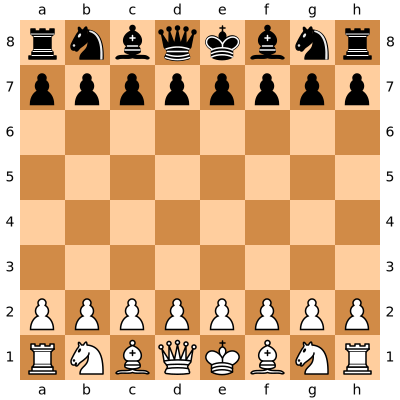

In [29]:
board

In [30]:
board.push_san('e4')

Move.from_uci('e2e4')

In [31]:
board.push_san('e5')

Move.from_uci('e7e5')

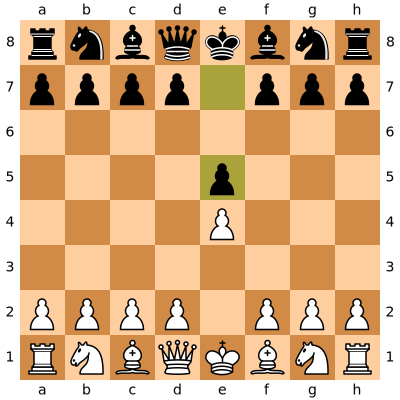

In [32]:
board

In [33]:
type(board.legal_moves)

chess.LegalMoveGenerator

In [34]:
board = chess.Board()
True == board.push_san('e4')

False

## Helper Functions

In [35]:
fics = pd.read_csv("FICS_data_fixed.csv")
fics = fics[(fics['5_q_buckets'] == '(951.0, 1518.0]') | (fics['5_q_buckets'] == '(1842.0, 3228.0]')]


In [36]:
def generate_fics_group(move_list):
    if len(move_list) ==1 :
        d =  fics.groupby(['move1b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d = d.unstack(level=1)
        return d
    elif len(move_list) ==2:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) ].groupby(['move2w','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==3:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2])].groupby(['move2b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==4:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2]) &(fics['move2b'] == move_list[3]) ].groupby(['move3w','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==5:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2]) &(fics['move2b'] == move_list[3]) & 
              (fics['move3w'] == move_list[4])].groupby(['move3b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==6:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2]) &(fics['move2b'] == move_list[3]) & 
              (fics['move3w'] == move_list[4]) &(fics['move3b'] == move_list[5])].groupby(['move4w','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
    elif len(move_list) ==7:
        d = fics[(fics['move1w'] == move_list[0]) & (fics['move1b'] == move_list[1]) & 
              (fics['move2w'] == move_list[2]) &(fics['move2b'] == move_list[3]) & 
              (fics['move3w'] == move_list[4]) &(fics['move3b'] == move_list[5]) &
              (fics['move4w'] == move_list[4])].groupby(['move4b','5_q_buckets']).agg({'5_q_buckets' : np.size})
        d = d / d.groupby(level=1).sum()
        d=d.unstack(level=1)
        return d
      

In [37]:
def generate_fics_chart(move_list):
    s = generate_fics_group(move_list).plot(kind='bar', title=generate_fics_title(move_list),
                                   legend =False)
    plt.legend( ('High Elo',"Low Elo") )
    plt.ylabel("Percent Move is Played")
    if len(move_list) % 2 ==0:
        plt.xlabel("Move for White")
    else:
        plt.xlabel("Move for Black")
    vals = s.get_yticks()
    s.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.show();

In [38]:
def generate_fics_title(move_list):
    s = ""
    if len(move_list) % 2 == 0:
        s+= "Most Common Moves for White Following "
    else:
        s+= "Most Common Moves for Black Following "
    if len(move_list) == 1:
        s+= ("1." + move_list[0])
    if len(move_list) == 2:
        s+= ("1." + move_list[0]+ " " + move_list[1])
    if len(move_list) ==3:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2])
    if len(move_list) ==4:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3])
    if len(move_list) ==6:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3]+ " 3." + move_list[4])
    if len(move_list) ==6:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3]+ " 3." + move_list[4] +" " + move_list[5])
    if len(move_list) ==7:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3]+ " 3." + move_list[4] +" " + move_list[5] +
            " 4."+ move_list[6])
    if len(move_list) ==8:
        s+= ("1." + move_list[0]+ " " + move_list[1]+" 2." + move_list[2] +
            " " + move_list[3]+ " 3." + move_list[4] +" " + move_list[5] +
            " 4."+move_list[6] + " "+move_list[7])
        
    return s

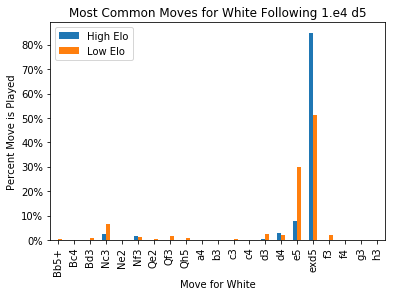

In [39]:
generate_fics_chart(['e4','d5'])

In [40]:
generate_fics_title(['e4','e5', 'Nf3', 'a3','a6','a4','a5'])

'Most Common Moves for Black Following 1.e4 e5 2.Nf3 a3 3.a6 a4 4.a5'

In [41]:
generate_fics_group(['e4','e5','Nf3'])

5_q_buckets                
5_q_buckets (1842.0, 3228.0] (951.0, 1518.0]
move2b                                      
Ba3                 0.000153             NaN
Bb4                 0.000611        0.001076
Bc5                 0.005038        0.052009
Bd6                 0.001527        0.011000
Be7                 0.000153        0.000239
Ke7                      NaN        0.000120
Na6                 0.000458        0.000239
Nc6                 0.694351        0.490794
Ne7                      NaN        0.000239
Nf6                 0.119389        0.069823
Nh6                      NaN        0.000359
Qe7                 0.001679        0.004782
Qf6                 0.006565        0.030249
Qg5                      NaN        0.000120
Qh4                      NaN        0.000239
a5                       NaN        0.000239
a6                  0.000153        0.005619
b6                  0.000305        0.001674
c5                       NaN        0.001196
c6                  0.000458        0.002989
d5                  0.006107        0.013989
d6                  0.119847        0.274988
f5                  0.038168        0.002391
f6                  0.003969        0.031923
g5                       NaN        0.000717
g6                  0.000305        0.000837
h5                  0.000153        0.000598
h6                  0.000611        0.001554

# Program draft

In [44]:
import chess
#import chess.svg
import random
import pandas as pd
import numpy as np

board = chess.Board()
move_list = []

def play():
    
    while len(move_list) <8:
        chess_practice()
        if len(move_list) == 8:
          sys.exit()
        break

def chess_practice():
    
    player_color = color_picker()
   
    print(player_color)
    if player_color == 'w':
        player_move()
        
    elif player_color =='b':
        computer_move()
            
def color_picker():
    player_color = input("What color do you want to play: \n 'w' for White, 'b' for Black\n")
    return player_color

def player_move():
    move_string = input("Please enter your move. \n i.e. e4 or Nf3 \n")
    try: 
        board.push_san(move_string)
        move_list.append(move_string)
        
        return computer_move()
        
    except ValueError: 
        print(move_string + " is not a legal move. Legal moves are", board.legal_moves)
        return player_move()
    
    
def computer_move():
    moves=['e5','d5','a5','b5']
    s = random.choice(moves)
    try:
        board.push_san(s)
        move_list.append(s)
        print("Black Plays " +s)
        generate_fics_chart(move_list)
        
        print(board)
        return player_move()
    except ValueError:
        computer_move()
    
    print(board)
    print(move_list)
    
    

What color do you want to play: 
 'w' for White, 'b' for Black
w
w
Please enter your move. 
 i.e. e4 or Nf3 
e4
Black Plays b5


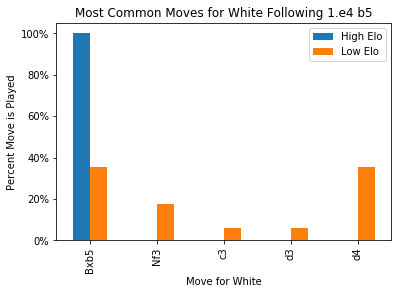

r n b q k b n r
p . p p p p p p
. . . . . . . .
. p . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


In [ ]:
play()